Problem 117: Simulating the  Hopfield Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
global N_spins;
global xi_array;

In [2]:
def define_n_spins(N):
    global N_spins;
    N_spins = []
    N_spins = np.random.random(N)
    #initializing the spins
    for spin_i in range(0,len(N_spins)):
        if N_spins[spin_i] <=0.5: N_spins[spin_i] = -1
        elif N_spins[spin_i] >0.5: N_spins[spin_i] = 1
    return N_spins      

In [3]:
#initializing the weights- binary patterns
def define_k_xis(N,K):
    global xi_array;
    xi_array = []
    for xi_i in range(0,K):
        xi_curr = np.random.random(N)
        #initializing the spins
        for i in range(0,len(xi_curr)):
            if xi_curr[i] <=0.5: xi_curr[i] = -1
            elif xi_curr[i] >0.5: xi_curr[i] = 1
        xi_array.append(xi_curr)
    return xi_array

In [4]:
#now must make W matrix for k
#calculate the entries individ. from xi_array?
def find_Wij(chosen_spin_num, second_chosen_spin_num,K):
    Wij = 0
    for mu in range(0,K):
        i = chosen_spin_num
        j = second_chosen_spin_num
        Wij = Wij+ np.int(xi_array[mu][i]*xi_array[mu][j])
    return Wij

In [6]:
#need to sum Wij * sigma_j
def update_spin(chosen_spin_num,K):
    input_to_sgn = 0
    for spin_j in range(0,len(N_spins)):
        input_to_sgn = input_to_sgn + find_Wij(chosen_spin_num, spin_j,K)*N_spins[spin_j]
    
    if (input_to_sgn == 0):
        rand_assign_0 = np.random.random(1)
        if rand_assign_0 > 0.5: input_to_sgn = 1
        elif rand_assign_0 <= 0.5: input_to_sgn = -1
            
    N_spins[chosen_spin_num] = np.sign(input_to_sgn)

Original N Spins [ 1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.
  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Text(0,0.5,'ms')

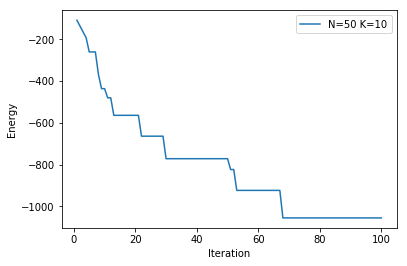

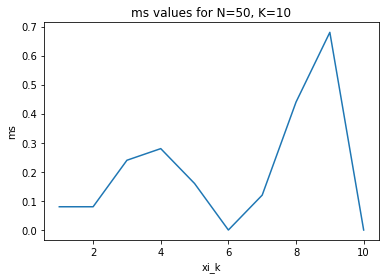

In [58]:
print('Original N Spins '+str(N_spins))
def hopfield_returnenergy(N,K,nupdate,starting_spin):
    xi_array = define_k_xis(N,K)
    if (starting_spin == True): N_spins = define_n_spins(N)
    elif (starting_spin == False): N_spins = xi_array[5]
    energy_updates = []
    for update_i in range(0,nupdate):
        chosen_spin_num = np.int(np.random.randint(0,high=N,size = 1))
        update_spin(chosen_spin_num,K)
        
        Energy = 0
        for mu in range(0,K):
            Energy = Energy + np.dot(xi_array[mu],N_spins)**2
        Energy = (-1/2)*Energy
        energy_updates.append(Energy)
        ms = []
        for xi_in in range(0,K):
            ms_i = (1/N)*np.abs(np.dot(xi_array[xi_in],N_spins))
            ms.append(ms_i)
    N_spins = []
    xi_array = []
    return energy_updates,ms

hf,ms = hopfield_returnenergy(50,10,100,True)    
x = np.linspace(1,100,100)
plt.plot(x,hf,label = 'N='+str(50)+" K="+str(10))
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.legend()
plt.figure()
x_ms = np.linspace(1,10,10)
print(x_ms)
plt.plot(x_ms, ms)
plt.title('ms values for N=50, K=10')
plt.xlabel('xi_k')
plt.ylabel('ms')


For large enough N and small enough K, the dynamics do appear to stop in the neighborhood of one of the xi vectors that we have used to scuplt the energy landscape, as seen by the spike in the plot where a value of ms for a particular xi_i is almost 1. 

If K is made larger, then we can see the emergence of more random stopping points:

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


Text(0,0.5,'ms')

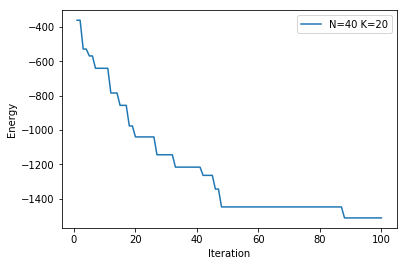

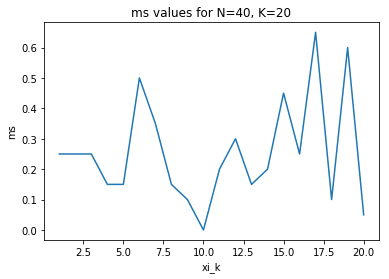

In [146]:
hf3,ms3 = hopfield_returnenergy(40,20,100,True)    
x = np.linspace(1,100,100)
plt.plot(x,hf3,label = 'N='+str(40)+" K="+str(20))
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.legend()
plt.figure()
x_ms = np.linspace(1,20,20)
print(x_ms)
plt.plot(x_ms, ms3)
plt.title('ms values for N=40, K=20')
plt.xlabel('xi_k')
plt.ylabel('ms')

If we make K even larger, then the dynamics do not stop in the neighborhood of one of the xi_i vectors, as seen below:


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


Text(0,0.5,'ms')

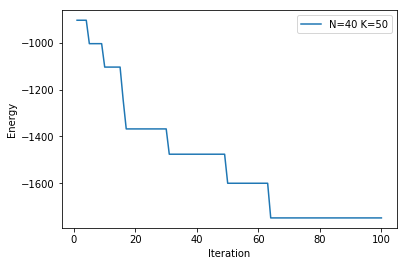

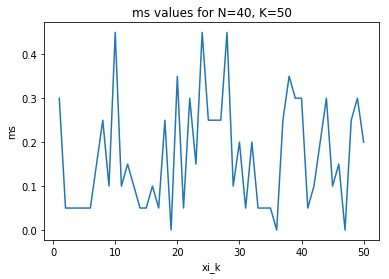

In [77]:
hf2,ms2 = hopfield_returnenergy(40,50,100,True)    
x = np.linspace(1,100,100)
plt.plot(x,hf2,label = 'N='+str(40)+" K="+str(50))
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.legend()
plt.figure()
x_ms = np.linspace(1,50,50)
print(x_ms)
plt.plot(x_ms, ms2)
plt.title('ms values for N=40, K=50')
plt.xlabel('xi_k')
plt.ylabel('ms')

This is equivalent to having too many memories, but not enough neurons to "hold" them all. 

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


Text(0,0.5,'ms')

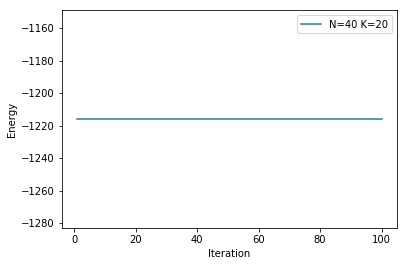

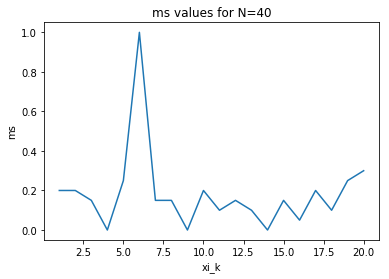

In [49]:
hf1,ms1 = hopfield_returnenergy(40,20,100,False)    
x = np.linspace(1,100,100)
plt.plot(x,hf1,label = 'N='+str(40)+" K="+str(20))
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.legend()
plt.figure()
x_ms = np.linspace(1,20,20)
print(x_ms)
plt.plot(x_ms, ms1)
plt.title('ms values for N=40')
plt.xlabel('xi_k')
plt.ylabel('ms')

Above: We see that when the starting spins are one of the xi_arrays, the state is stable. But, if run over more cycles >100, we expect there to be more chances for the state to destabilize with larger values of K (which means that the state is closer to another state). When the system starts in a state closer to memory K, higher weights encourage the system to flip to be closer to that memory. When K>>N, there are too many minima and the energy landscape is saturated. 

In [7]:
def hopfield_returnms(N,K,nupdate):
    N_spins = define_n_spins(N)
    xi_array = define_k_xis(N,K)
    energy_updates = []
    for update_i in range(0,nupdate):
        chosen_spin_num = np.int(np.random.randint(0,high=N,size = 1))
        update_spin(chosen_spin_num,K)
   
    ms = []
    for xi_in in range(0,K):
        ms_i = (1/N)*np.abs(np.dot(xi_array[xi_in],N_spins))
        ms.append(ms_i)
    N_spins = []
    xi_array = []
    return max(ms)  


In [15]:
ms_values = [[np.nan for i in range(1,101)] for j in range(1,101)]
print(np.shape(ms_values))
for n_i in range(1,100):
    if (n_i % 10 == 0):print(n_i)
    for k_i in range(1,100):
        ms_value = np.mean([hopfield_returnms(n_i,k_i,100) for _ in range(3)])
        ms_values[n_i][k_i] = ms_value
        

(100, 100)
10
20
30
40
50
60
70
80
90


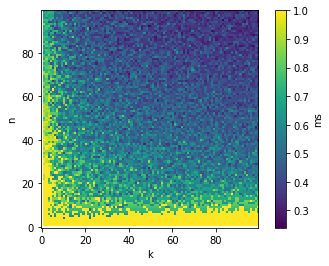

<Figure size 432x288 with 0 Axes>

In [21]:
im = plt.imshow(ms_values,origin='lower')
ax = plt.gca()
cbar = ax.figure.colorbar(im, ax=ax,label = "ms")
plt.xlabel("k")
plt.ylabel("n")
plt.show()
plt.savefig('ms_values.png')

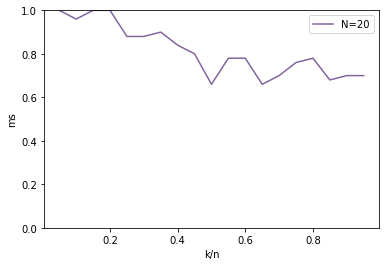

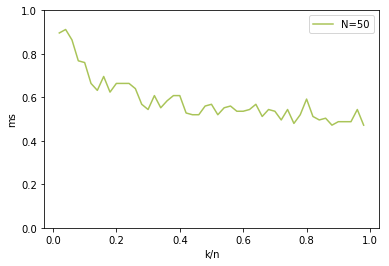

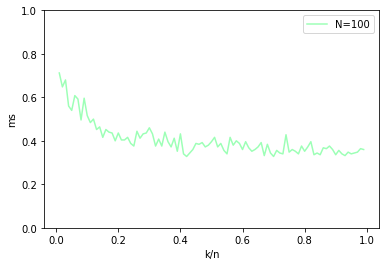

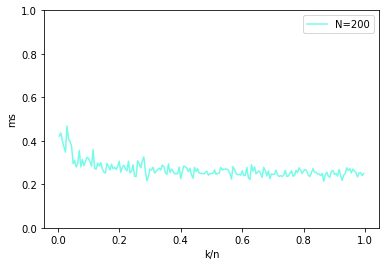

KeyboardInterrupt: 

In [143]:
plt.figure()
global NN;
n_array = [20,50,100,200,300]
for n_idx in range(len(n_array)):
    n_i = n_array[n_idx]
    NN = n_i
    ms_values1 = []
    k_over_n = []
    for k_i in range(1,n_i):
        #print(np.int(n_i/100))
        #print(k_i)
        ms_value1 = np.mean([hopfield_returnms(n_i,k_i,100) for _ in range(5)])
        ms_values1.append(ms_value1)
        k_over_n.append(k_i/n_i)
    plt.ylim(0,1)
    plt.plot(k_over_n,ms_values1,label = 'N='+str(n_i),color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)))
    plt.xlabel('k/n')
    
    plt.ylabel('ms')
    plt.legend(loc = "upper right")
    plt.show()

Due to running time (the error message is because I cut it short), it is difficult to say whether a thermodynamic limit emerges while the <ms> depends only on k/n. I was looking for this in the plots above (ideally, which would have been plotted on the same plot for better comparison). I anticipate this would appear on the plots above as the k/n vs ms lines converging after a certain critical value. As N increases, it does appear, particularly when looking at the plots for N=100 and N=200,  that this trend would emerge for high N sometime after the initial decrease in the plots between k/n values of 0.0 and 0.1. 